In [4]:
import numpy as np
import tables as tb
from matplotlib import pyplot as plt

# Inspect a data file

In [20]:
data = tb.open_file('../data/2022-04-11/fscv0001.h5', mode='r')
data

File(filename=../data/2022-04-11/fscv0001.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/array_command (EArray(1000, 282), shuffle, blosc(5)) 'Command'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 1
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1000, 8)
/array_scans (EArray(1000, 282), shuffle, blosc(5)) 'Scans'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 1
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1000, 8)
/array_ts (EArray(1, 282)) 'Times'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 1
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 8192)

In [21]:
data.root.array_ts.attrs

/array_ts._v_attrs (AttributeSet), 27 attributes:
   [Aquisition_period := 0.02051198399567511,
    Aquisition_period_max := 0.04016614300053334,
    Aquisition_period_min := 0.010436004005896393,
    Background_file := '2022-04-11/fscv0000.h5',
    Blosc_compression_level := 5,
    CLASS := 'EARRAY',
    Data_file := 'fscv0001.h5',
    Data_path := '/home/ms/bucket/FSCV/data/2022-04-11',
    EXTDIM := 1,
    GUI_update_period := 0.1,
    Live_background_subtraction := True,
    Live_waterfall := True,
    Load_background := None,
    N_scans_acquired := 53,
    N_scans_limit := 0,
    Reload_symphonies := None,
    Samples_per_scan := 1000,
    Sampling_rate := 100000.0,
    State := '',
    Symphony := 'None',
    TITLE := 'Times',
    VERSION := '1.1',
    Waterfall_n_scans := 600,
    Waterfall_update_period := 0.3,
    n_scans_background := 50,
    start_time := 1649676981.3567889,
    start_time_str := 'Mon Apr 11 13:36:21 2022']

# Plot the waterfall
## Raw

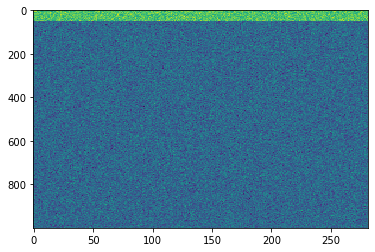

In [22]:
#commands = np.transpose(data1.root.array_command)
scans = np.transpose(data.root.array_scans)
plt.imshow(scans, aspect='auto', interpolation='none');

## Baseline corrected

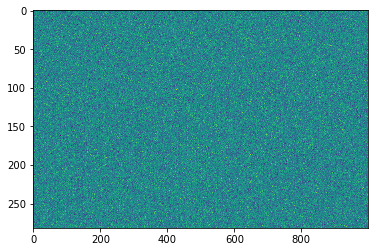

In [48]:
# In this example we use the first 1.5 seconds for the baseline subtraction
i_t_baseline = np.argmin(np.abs(data.root.array_ts[:] - 1.5))
baseline = data.root.array_scans[:,:i_t_baseline].mean(1)


corrected_scans = np.subtract(scans.T, baseline)
plt.imshow(corrected_scans, aspect='auto', interpolation='none');

# Plot the duck

## Raw

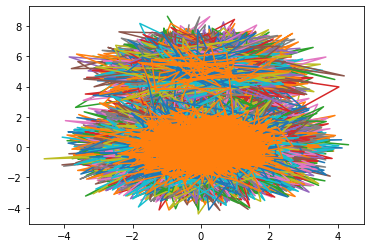

In [13]:
commands = np.transpose(data1.root.array_command)
scans = np.transpose(data1.root.array_scans)
plt.plot(commands, scans);

## Corrected

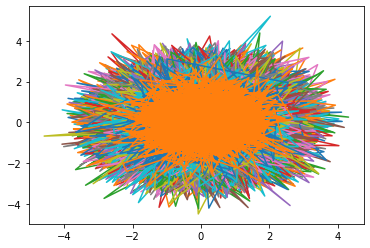

In [50]:
commands_T = np.transpose(data1.root.array_command)
scans_CT = np.transpose(corrected_scans)
plt.plot(commands_T, scans_CT);